# Université Paul Sabatier

M1IAFA - Recherche d'information

**TP 1**

Enseignant : José G. Moreno

2023

TP 1. Indexation d’un corpus des documents textes avec PyTerrier (version python de Terrier)

Étapes à suivre pendant ce TP :
1. Installation de l’environnement de travail
2. Collecte du corpus de documents
3. Analyses et exploration du code pour l’indexation et la recherche
4. Reconfiguration de l’indexation
5. Questions ouvertes


L'indexation de documents est une tâche très importante pour la recherche d'information. Dans ce TP, nous allons utiliser Terrier (http://terrier.org/) pour faire l'indexation de documents

## 1. Installation de l’environnement de travail

L'installation d'un framework comme terrier peut être un peu compliqué. Cependant, ses créteurs ont décidé de simplifier plusieurs de tâches dans l'installation. Pour cela, nous allons faire une installation simple à l'aide de pip sur python.

In [1]:
# déclaration de la variable JAVA_HOME
import os
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-11-openjdk-amd64'
!export JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64

In [2]:
#installation de pyterrier avec pip
!pip install --upgrade git+https://github.com/terrier-org/pyterrier.git#egg=python-terrier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/terrier-org/pyterrier.git to /tmp/pip-install-rf44tuup/python-terrier_9b612e154835441294d8d417f4dc678e
  Running command git clone --filter=blob:none --quiet https://github.com/terrier-org/pyterrier.git /tmp/pip-install-rf44tuup/python-terrier_9b612e154835441294d8d417f4dc678e
  Resolved https://github.com/terrier-org/pyterrier.git to commit dc7997ed4bb4bbaf78f639a511bfe92fcd290c02
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.5/311.5 KB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
    

In [3]:
#Initialization de JVM
import pyterrier as pt
if not pt.started():
  pt.init()

terrier-assemblies 5.7 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.7 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.9.2 has loaded Terrier 5.7 (built by craigm on 2022-11-10 18:30) and terrier-helper 0.0.7



In [4]:
#Création du dossier pour le stockage des indexes
!rm -rf ./pd_index
pd_indexer = pt.DFIndexer("./pd_index")

## 2. Collecte du corpus de documents
Le concept théorique a été vu en cours : diapositives 12 et 17
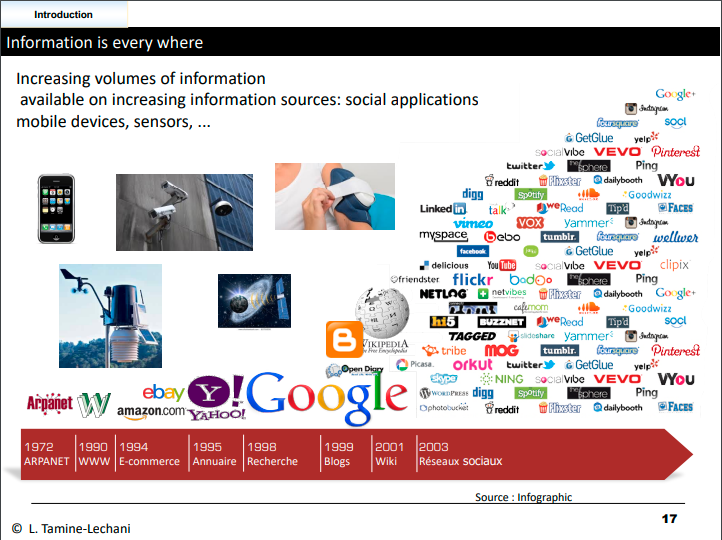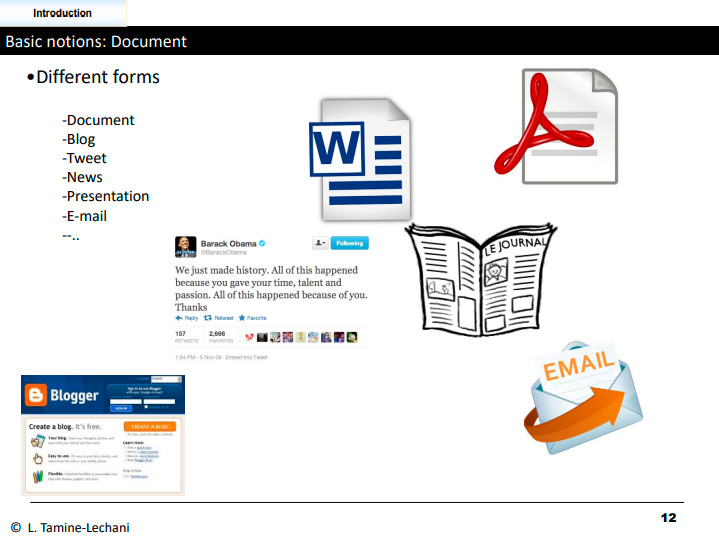

Il existent des corpus des documents textes à télécharger gratuitement hebergés sur [datasets de hugging faces](https://huggingface.co/docs/datasets/index). Nous allons utiliser la [wikipédia simple](https://simple.wikipedia.org/wiki/Main_Page). 


## 3. Chargement du dataframe
Voici les lignes pour télécharger et charger la collection dans un dataframe

In [5]:
!pip -q install apache_beam 
!pip -q install datasets 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 KB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 KB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.5/515.5 KB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 68.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.1 MB/s eta 

In [6]:
import pandas as pd
from datasets import load_dataset 

In [7]:
wksimple = load_dataset("wikipedia", "20220301.simple")
df = pd.DataFrame(wksimple['train'])
df.columns = ['docno','url','title','text']
df

Downloading:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/235M [00:00<?, ?B/s]

Dataset wikipedia downloaded and prepared to /root/.cache/huggingface/datasets/wikipedia/20220301.simple/2.0.0/aa542ed919df55cc5d3347f42dd4521d05ca68751f50dbc32bae2a7f1e167559. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

,docno,url,title,text
0,1,https://simple.wikipedia.org/wiki/April,April,April is the fourth month of the year in the J...
1,2,https://simple.wikipedia.org/wiki/August,August,August (Aug.) is the eighth month of the year ...
2,6,https://simple.wikipedia.org/wiki/Art,Art,Art is a creative activity that expresses imag...
3,8,https://simple.wikipedia.org/wiki/A,A,A or a is the first letter of the English alph...
4,9,https://simple.wikipedia.org/wiki/Air,Air,Air refers to the Earth's atmosphere. Air is a...
...,...,...,...,...
205323,910281,https://simple.wikipedia.org/wiki/Noticiero%20...,Noticiero Univision,Noticiero Univision is the flagship daily even...
205324,910287,https://simple.wikipedia.org/wiki/Bachhan%20Pa...,Bachhan Paandey,Bachchhan Paandey is an upcoming Indian Hindi-...
205325,910294,https://simple.wikipedia.org/wiki/Repdigit,Repdigit,"In recreational math, a repdigit or a monodigi..."
205326,910309,https://simple.wikipedia.org/wiki/Lady%20in%20...,Lady in a Cage,Lady in a Cage is a 1964 American psychologica...


## 4. Indexation du dataframe
Voici un code exemple pour indexer les résumés (abstract) de chaque page Wikipédia comme un document. La tâche semble trivial, cependant la librarie Terrier fait la plus part du travail. Pour plus de détails, consultez la documentation de [DFIndexer](https://pyterrier.readthedocs.io/en/latest/terrier-indexing.html?highlight=DFIndexer#dfindexer)

In [8]:
indexref2 = pd_indexer.index(df["text"], df["docno"], df["url"], df["title"])

15:06:27.801 [main] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (327848) - further warnings are suppressed
15:08:25.792 [main] WARN org.terrier.structures.indexing.Indexer - Indexed 15 empty documents


In [9]:
#statistiques de l'index
index = pt.IndexFactory.of(indexref2)
print(index.getCollectionStatistics().toString())

Number of documents: 205328
Number of terms: 441465
Number of postings: 13150721
Number of fields: 0
Number of tokens: 21962652
Field names: []
Positions:   false



Notez que le dossier pn_index/ n'est plus vide. Si vous voulez sauvegarder l'indexe de façon pérenne, il faudra stocker localement ou ailleurs le dossier pd_index. La commande suivante vous permet de générer un fichier zip avec votre indexe. Pensez à sauvergarder à chaque fois vos indexes (normalement l'indexation est une tâche lourde en temps de calcule, mais elle a été simplifié pour le TP). 

In [10]:
!zip -r pd_index.zip pd_index/

  adding: pd_index/ (stored 0%)
  adding: pd_index/data.properties (deflated 79%)
  adding: pd_index/data.lexicon.fsomapfile (deflated 83%)
  adding: pd_index/data.direct.bf (deflated 10%)
  adding: pd_index/data.inverted.bf (deflated 9%)
  adding: pd_index/data.meta.idx (deflated 65%)
  adding: pd_index/data.lexicon.fsomaphash (deflated 54%)
  adding: pd_index/data.meta-0.fsomapfile (deflated 80%)
  adding: pd_index/data.document.fsarrayfile (deflated 59%)
  adding: pd_index/data.lexicon.fsomapid (deflated 26%)
  adding: pd_index/data.meta.zdata (deflated 67%)


## 5 Exécution d’une recherche avec la requête "France"

Voici le code pour exécuter une requête en utilisant le modèle TF-IDF (paramètre ```wmodel``` de la methode ```BatchRetrieve```)

In [11]:
pt.BatchRetrieve(indexref2, wmodel="TF_IDF", metadata=["docno","title","url"]).search("france")

,qid,docid,docno,title,url,rank,score,query
0,1,135084,646231,France (disambiguation),https://simple.wikipedia.org/wiki/France%20%28...,0,4.113606,france
1,1,142198,677399,Swiss franc,https://simple.wikipedia.org/wiki/Swiss%20franc,1,4.066968,france
2,1,15794,60477,Luxembourg franc,https://simple.wikipedia.org/wiki/Luxembourg%2...,2,3.995608,france
3,1,19569,74924,Stade de France,https://simple.wikipedia.org/wiki/Stade%20de%2...,3,3.985585,france
4,1,35437,139945,Metropolitan France,https://simple.wikipedia.org/wiki/Metropolitan...,4,3.981251,france
...,...,...,...,...,...,...,...,...
995,1,69205,293863,Arquves,https://simple.wikipedia.org/wiki/Arqu%C3%A8ves,995,3.560755,france
996,1,108289,470553,Authuille,https://simple.wikipedia.org/wiki/Authuille,996,3.560755,france
997,1,108291,470555,Authieule,https://simple.wikipedia.org/wiki/Authieule,997,3.560755,france
998,1,108320,470699,Champien,https://simple.wikipedia.org/wiki/Champien,998,3.560755,france


D'autres modèles sont disponibles. Ils sont décrits ici 

http://terrier.org/docs/v4.0/configure_retrieval.html

[Q5] Utilisez le modèle **DFR BM25** pour faire une recherche avec la requête **france**

In [12]:
#réponse Q5 
pt.BatchRetrieve(indexref2, wmodel="DFR_BM25", metadata=["docno","title","url"]).search("france")

,qid,docid,docno,title,url,rank,score,query
0,1,135084,646231,France (disambiguation),https://simple.wikipedia.org/wiki/France%20%28...,0,3.186070,france
1,1,142198,677399,Swiss franc,https://simple.wikipedia.org/wiki/Swiss%20franc,1,3.145529,france
2,1,15794,60477,Luxembourg franc,https://simple.wikipedia.org/wiki/Luxembourg%2...,2,3.090402,france
3,1,19569,74924,Stade de France,https://simple.wikipedia.org/wiki/Stade%20de%2...,3,3.081936,france
4,1,35437,139945,Metropolitan France,https://simple.wikipedia.org/wiki/Metropolitan...,4,3.081354,france
...,...,...,...,...,...,...,...,...
995,1,45283,158807,Communes of Mayotte,https://simple.wikipedia.org/wiki/Communes%20o...,995,2.773795,france
996,1,52120,193252,A.S. Cannes Football,https://simple.wikipedia.org/wiki/A.S.%20Canne...,996,2.773795,france
997,1,120851,556080,Acheux-en-Aminois,https://simple.wikipedia.org/wiki/Acheux-en-Am...,997,2.773795,france
998,1,120853,556082,Ailly-le-Haut-Clocher,https://simple.wikipedia.org/wiki/Ailly-le-Hau...,998,2.773795,france


## 7 Lecture d'un index existant

Pour tester la lecture d'un index existant, utlisez le code suivant (n'oubliez pas sauvegarder le dossier ou le fichier zip créé précédemment de l'index avant redemarrer le notebook) 

In [13]:
indexref2 = pt.autoclass("org.terrier.querying.IndexRef").of(os.path.join("/content/pd_index", "data.properties"))

In [14]:
pt.BatchRetrieve(indexref2, metadata=["docno"]).search("france")

,qid,docid,docno,rank,score,query
0,1,65366,275085,0,4.915403,france
1,1,101829,445225,1,4.889501,france
2,1,133544,636060,2,4.888570,france
3,1,35437,139945,3,4.882552,france
4,1,3640,11040,4,4.863779,france
...,...,...,...,...,...,...
995,1,108321,470700,995,3.814673,france
996,1,108322,470701,996,3.814673,france
997,1,111103,482781,997,3.814673,france
998,1,120859,556089,998,3.814673,france


## 8 Questions du TP



### 8.1 Inspention du code





Cherchez sur la documentation de lucene les différents Analyzers et identifiez leurs différences.
Pourquoi on a besoin de plusieurs Analyzers ?


Qu'est-ce que la classe TextField et à quoi serve-t-elle ? Pouvez vous utiliser une autre classe ?
Laquelle ?



(réponse Q8.1)


### 8.2. Reconfiguration de l’indexation
Le concept théorique a été vu en cours : diapositive 20

Modifiez le code pour indexer d'autres champs de chaque document. Par exemple la colonne ***title*** du dataframe. 



In [24]:
!rm -rf ./pd_index2/

In [25]:
#réponse Q8.1
pd_indexer2 = pt.DFIndexer("./pd_index2")
indexref = pd_indexer2.index(df["title"], df["docno"],df["url"],df["title"],df["text"])

15:31:08.771 [main] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (8) - further warnings are suppressed
15:37:34.115 [main] WARN org.terrier.structures.indexing.Indexer - Indexed 326 empty documents


In [26]:
!zip -r pd_index2.zip pd_index2/

updating: pd_index2/ (stored 0%)
updating: pd_index2/data.properties (deflated 79%)
updating: pd_index2/data.lexicon.fsomapfile (deflated 85%)
updating: pd_index2/data.direct.bf (deflated 20%)
updating: pd_index2/data.inverted.bf (deflated 15%)
updating: pd_index2/data.meta.idx (deflated 54%)
updating: pd_index2/data.lexicon.fsomaphash (deflated 57%)
updating: pd_index2/data.meta-0.fsomapfile (deflated 80%)
updating: pd_index2/data.document.fsarrayfile (deflated 78%)
updating: pd_index2/data.lexicon.fsomapid (deflated 31%)
updating: pd_index2/data.meta.zdata (deflated 5%)


### 8.3 BM11 et BM15
Deux varitations de BM25 sont BM11 et BM15 (https://en.wikipedia.org/wiki/Okapi_BM25#Modifications). Pour les calculer, il sufit de modifier un paramètre uniquement. Ci-dessous vous trouverez le calcule pour BM11. 

In [18]:
from heapq import nlargest

In [19]:
index = pt.IndexFactory.of(indexref)
inv = index.getInvertedIndex()
meta = index.getMetaIndex()
lex = index.getLexicon()
le = lex.getLexiconEntry( "franc" )

In [20]:
wmodel = pt.autoclass("org.terrier.matching.models.BM25")()
wmodel.setCollectionStatistics(index.getCollectionStatistics())
wmodel.setEntryStatistics(le);
wmodel.setKeyFrequency(1)
wmodel.prepare()

In [21]:
#BM11
wmodel.setParameter(1)

for docno, url, title, score in nlargest(10, [(meta.getItem("docno", posting.getId()),meta.getItem("url", posting.getId()),meta.getItem("title", posting.getId()),wmodel.score(posting)) for posting in inv.getPostings(le)], key=lambda e:e[3]):
  print("%s %s %s with score %0.4f"  % (docno, url, title, score))

291 https://simple.wikipedia.org/wiki/France France with score 14.1790
11036 https://simple.wikipedia.org/wiki/Claude%20of%20France Claude of France with score 10.4753
11041 https://simple.wikipedia.org/wiki/Francis%20I%20of%20France Francis I of France with score 10.4753
19164 https://simple.wikipedia.org/wiki/Frances%20Winfield Frances Winfield with score 10.4753
20610 https://simple.wikipedia.org/wiki/Vichy%20France Vichy France with score 10.4753
25510 https://simple.wikipedia.org/wiki/Marie%20of%20France Marie of France with score 10.4753
25511 https://simple.wikipedia.org/wiki/Alix%20of%20France Alix of France with score 10.4753
28272 https://simple.wikipedia.org/wiki/Departments%20of%20France Departments of France with score 10.4753
33989 https://simple.wikipedia.org/wiki/Nancy%2C%20France Nancy, France with score 10.4753
50037 https://simple.wikipedia.org/wiki/Air%20France Air France with score 10.4753


Proposez le code pour le calcule de BM15

In [22]:
#réponse Q8.3
wmodel.setParameter(0)

for docno, url, title, score in nlargest(10, [(meta.getItem("docno", posting.getId()),meta.getItem("url", posting.getId()),meta.getItem("title", posting.getId()),wmodel.score(posting)) for posting in inv.getPostings(le)], key=lambda e:e[3]):
  print("%s %s %s with score %0.4f"  % (docno, url, title, score))

291 https://simple.wikipedia.org/wiki/France France with score 9.9702
5571 https://simple.wikipedia.org/wiki/Robert%20II%20of%20France Robert II of France with score 9.9702
10921 https://simple.wikipedia.org/wiki/Henry%20IV%20of%20France Henry IV of France with score 9.9702
10924 https://simple.wikipedia.org/wiki/Henrietta%20Maria%20of%20France Henrietta Maria of France with score 9.9702
11033 https://simple.wikipedia.org/wiki/Mary%20Tudor%2C%20Queen%20of%20France Mary Tudor, Queen of France with score 9.9702
11034 https://simple.wikipedia.org/wiki/Louis%20XII%20of%20France Louis XII of France with score 9.9702
11036 https://simple.wikipedia.org/wiki/Claude%20of%20France Claude of France with score 9.9702
11039 https://simple.wikipedia.org/wiki/Lady%20Frances%20Brandon Lady Frances Brandon with score 9.9702
11040 https://simple.wikipedia.org/wiki/Henry%20II%20of%20France Henry II of France with score 9.9702
11041 https://simple.wikipedia.org/wiki/Francis%20I%20of%20France Francis I of 

### 8.4 Questions ouvertes
Rapellez vous sur Elasticsearch et les commandes/code pour faire le même index.
Quelles différences identifiez-vous ?


Pour Terrier, où sont les « fichiers d’indexation » mentionnés dans la diapositive 3 (chapitre 1) du cours ?
Pourquoi sont-ils nécessaires ?